In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

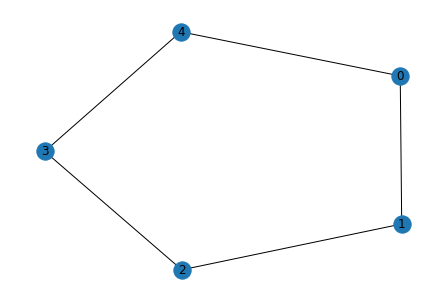

In [3]:
# Draw a circulant graph
circulant_graph = nx.circulant_graph(5, [1])
nx.draw(circulant_graph, with_labels=True)

## Degree centrality

In [4]:
# Degree distribution
circulant_graph.degree()

DegreeView({0: 2, 1: 2, 2: 2, 3: 2, 4: 2})

In [5]:
# Degree centrality
nx.degree_centrality(circulant_graph)

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}

\begin{equation}
C_{D}(x) = \frac{k_i}{n-1}
\end{equation}

In [6]:
circulant_graph_degrees = [degree for node, degree in circulant_graph.degree()]
circulant_degree_centrality = list(nx.degree_centrality(circulant_graph).values())

In [7]:
node_count = len(circulant_graph.nodes)
degree_centrality_hat = [degree / (node_count - 1) for degree in circulant_graph_degrees]
degree_centrality_hat

[0.5, 0.5, 0.5, 0.5, 0.5]

In [8]:
np.testing.assert_array_equal(degree_centrality_hat, circulant_degree_centrality)

## Eigenvector centrality

### Eigenvectors and eigenvalues

In [9]:
A = np.array([[0, 1], [-2, -3]])
value, vectors = np.linalg.eig(A)
value

array([-1., -2.])

In [10]:
# Numpy returns normalised results
1 / np.linalg.norm([1, -1])

0.7071067811865475

### Eigenvector centrality

$$
\textbf{Eigenvector centrality is based on the concept of importance of neigbours}. \\
$$

\begin{equation*}
C_{E}(x_{i}) = \kappa^{-1} \sum_{j \in neighbors(i)} C_E(x_{j})
\end{equation*}
\begin{equation*}
C_{E}(x_{i}) = \kappa^{-1} \sum_{j=1}^{n} A_{ij}C_E(x_{j})
\end{equation*}

$$
\textbf{Rewriting in matrix notation:} \\
$$
\begin{equation*}
    \textbf{C} = \kappa^{-1} \textbf{A}\textbf{C}
\end{equation*}
\begin{equation*}
    \textbf{C} \kappa =  \textbf{A}\textbf{C}
\end{equation*}

In [11]:
# Find expected values of centrality
eigen_vector_centrality = list(nx.eigenvector_centrality(circulant_graph).values())
eigen_vector_centrality

[0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579]

In [12]:
# Compute adjacency matrix and its eigenvalues
A = nx.adjacency_matrix(circulant_graph).todense()
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [13]:
# Find the largest eigenvalue
largest_eigenvalue = np.argmax(eigenvalues)
largest_eigenvalue

2

In [14]:
# Find the corresponding eigenvector
primary_eigen_vector = eigenvectors[:, largest_eigenvalue].flatten().A1
primary_eigen_vector

array([-0.4472136, -0.4472136, -0.4472136, -0.4472136, -0.4472136])

In [15]:
# Find the normalising denominator
norm = np.sign(primary_eigen_vector.sum()) * np.linalg.norm(primary_eigen_vector)
norm

-1.0

In [16]:
# Compute the actual values for the centrality
eigen_vector_centrality_hat = primary_eigen_vector / norm
eigen_vector_centrality_hat

array([0.4472136, 0.4472136, 0.4472136, 0.4472136, 0.4472136])

In [17]:
# Check if implementation is correct
np.testing.assert_array_almost_equal(eigen_vector_centrality_hat, eigen_vector_centrality)

In [18]:
def compute_eigenvector_centrality(graph):
    # Generate adjacency matrix
    A = nx.adjacency_matrix(graph).todense()

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A,)

    # Find the index of the largest eigenvalue
    largest_eigenvalue = np.argmax(eigenvalues)

    # Find the eigenvector corresponding to the largest eigenvalue
    primary_eigen_vector = eigenvectors[:, largest_eigenvalue].flatten().real.A1

    # Compute the norm of the eigenvector
    norm = np.sign(primary_eigen_vector.sum()) * np.linalg.norm(primary_eigen_vector)

    # Compute the eigenvector centrality
    eigen_vector_centrality = primary_eigen_vector / norm

    return eigen_vector_centrality

In [19]:
circulant_adjacency_matrix = nx.adjacency_matrix(circulant_graph).todense()
circulant_adjacency_matrix

matrix([[0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]])

In [20]:
np.testing.assert_array_almost_equal(compute_eigenvector_centrality(circulant_graph), eigen_vector_centrality)

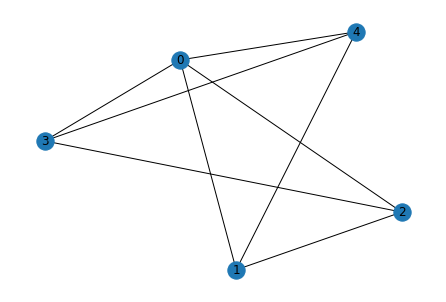

In [21]:
# Generate a wheel graph
wheel_graph = nx.wheel_graph(5)
nx.draw(wheel_graph, with_labels=True)


In [22]:
# Check degree centrality
nx.degree_centrality(wheel_graph)

{0: 1.0, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.75}

In [23]:
compute_eigenvector_centrality(wheel_graph)

array([0.52573111, 0.4253254 , 0.4253254 , 0.4253254 , 0.4253254 ])

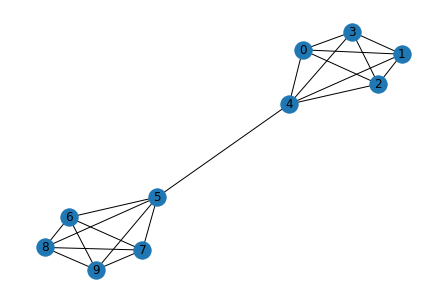

In [24]:
barbell_graph = nx.barbell_graph(5, 0)
nx.draw(barbell_graph, with_labels=True)

In [25]:
nx.degree_centrality(barbell_graph)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.4444444444444444,
 3: 0.4444444444444444,
 4: 0.5555555555555556,
 5: 0.5555555555555556,
 6: 0.4444444444444444,
 7: 0.4444444444444444,
 8: 0.4444444444444444,
 9: 0.4444444444444444}

In [26]:
compute_eigenvector_centrality(barbell_graph)

array([0.30075048, 0.30075048, 0.30075048, 0.30075048, 0.37174803,
       0.37174803, 0.30075048, 0.30075048, 0.30075048, 0.30075048])

In [27]:
def plot_directed_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

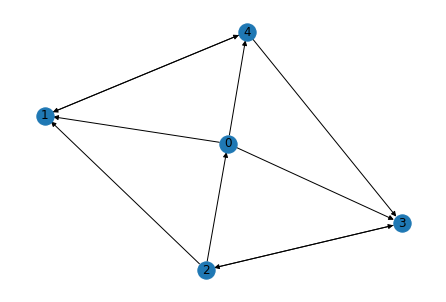

In [28]:
random_directed_graph = nx.gnp_random_graph(5, 0.4, directed=True)
plot_directed_graph(random_directed_graph)

In [29]:
nx.eigenvector_centrality_numpy(random_directed_graph)

{0: 0.1949171998469356,
 1: 0.5703868295284052,
 2: 0.33343395694087347,
 3: 0.5703868295284054,
 4: 0.44737770503641494}

<strong> Note: </strong> For a directed graph, networkx considers the left. <br />
The equation is rewritten to sum over the centralities of the nodes pointing to the current node. <br />

<strong>Thus, a node with all outgoing edges will have a centrality of 0.</strong> 
The above results show a minimal eigenvector centrality for nodes with no incoming edges but no zero.

### Katz centrality

Eigenvector centrality faces issues with directed graphs such as considering nodes with no incoming edges to have zero centrality.<br />
This might not always be desirable. Hence, Katz centrality adds a constant centrality for each node.

$$
    C_{K}(x_{i}) = \alpha \sum_{j=1}^n A_{ij}C_K(x_{j}) + \beta
$$

The second term ensures that nodes with no incoming edges have a certain centrality.

$$
    \textbf{C} =  \alpha\textbf{A}\textbf{C} + \beta\textbf{1}
$$
$$
    \textbf{C} - \alpha\textbf{A}\textbf{C} = \beta\textbf{1} \\
    \textbf{C} = \beta(\textbf{I} - \alpha\textbf{A})^{-1}\textbf{1}
$$

Setting $\beta$ = 1:
$$
    \textbf{C} = (\textbf{I} - \alpha\textbf{A})^{-1}\textbf{1}
$$

$\alpha$ cannot be larger than $\frac{1}{\kappa_{1}}$, which is the largest positive eigenvalue of $\textbf{A}$.

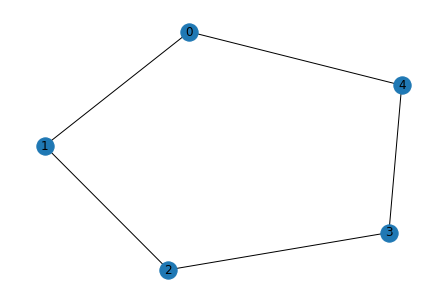

In [30]:
nx.draw(circulant_graph, with_labels=True)

In [31]:
nx.eigenvector_centrality(circulant_graph)

{0: 0.4472135954999579,
 1: 0.4472135954999579,
 2: 0.4472135954999579,
 3: 0.4472135954999579,
 4: 0.4472135954999579}

In [32]:
nx.katz_centrality(circulant_graph, alpha=0.05)

{0: 0.4472135954999579,
 1: 0.4472135954999579,
 2: 0.4472135954999579,
 3: 0.4472135954999579,
 4: 0.4472135954999579}

Katz centrality was expected to be similar to eigenvector centrality for undirected graphs.

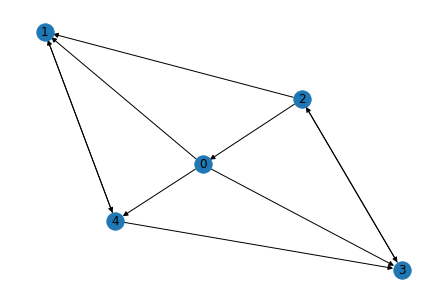

In [33]:
nx.draw(random_directed_graph, with_labels=True)

In [34]:
nx.adjacency_matrix(random_directed_graph).todense()


matrix([[0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 1, 0]])

In [35]:
nx.eigenvector_centrality(random_directed_graph)

{0: 0.19491661957203724,
 1: 0.5703868468686107,
 2: 0.3334333877257062,
 3: 0.5703868468686107,
 4: 0.4473783378785083}

In [36]:
nx.katz_centrality(random_directed_graph)

{0: 0.40066755078272864,
 1: 0.4855796167039366,
 2: 0.4083868160910343,
 3: 0.4855796167039366,
 4: 0.44845355821546695}

In [37]:
def compute_katz_centrality(graph, alpha = 0.1, beta = 1):
    # Generate adjacency matrix
    A = nx.adjacency_matrix(graph).todense().T
    
    # Generate the identity matrix
    n = graph.number_of_nodes()
    I = np.eye(n, n)
    
    # Compute beta vector
    beta = np.ones((n, 1)) * float(beta)

    # Compute the Katz centrality
    katz_centrality = np.linalg.solve(I - alpha * A, beta).flatten()

    # TODO - Compute the normalisation denominator
    return katz_centrality

In [38]:
compute_katz_centrality(random_directed_graph)

array([1.11349474, 1.3494739 , 1.13494739, 1.3494739 , 1.24629686])

In [39]:
nx.katz_centrality_numpy(random_directed_graph, normalized=False)

{0: 1.113494738992747,
 1: 1.3494738992746962,
 2: 1.1349473899274696,
 3: 1.3494738992746962,
 4: 1.2462968638267444}

### PageRank

A problem with Katz centrality is that a prestigious node conveys it own centrality to all other nodes and thus possibly giving them a centrality that is too high.
PageRank is an extension of Katz centrality that solves this problem by dividing the centrality by the number of out-going edges.

\begin{equation*}
    C_P(x_{i}) = \alpha \sum_{j=1}^n A_{ij} \frac{C_P(x_{j})}{k_j^{out}} + \beta
\end{equation*}

\begin{equation*}
    \textbf{C} =  \alpha\textbf{A}\textbf{D}^{-1}\textbf{C} + \beta\textbf{1}
\end{equation*}
\begin{equation*}
    \textbf{C} =  \beta(\textbf{I} -\alpha\textbf{A}\textbf{D}^{-1})^{-1}\textbf{1}
\end{equation*}
\begin{equation*}
    \textbf{C} =  (\textbf{I} -\alpha\textbf{A}\textbf{D}^{-1})^{-1}\textbf{1}
\end{equation*}

$$
where \quad D_{ii} = max(k_i^{out}, 1)
$$


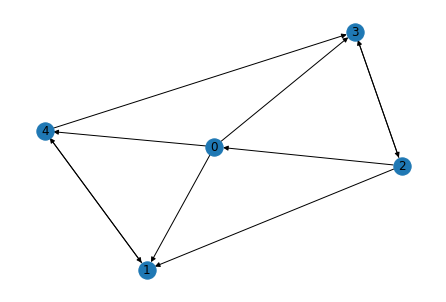

In [40]:
nx.draw(random_directed_graph, with_labels=True)

In [41]:
nx.pagerank(random_directed_graph)

{0: 0.09199955627699073,
 1: 0.22214381392686877,
 2: 0.21882307782429541,
 3: 0.22214381392686877,
 4: 0.24488973804497605}

## Hubs and authorities

Hubs => nodes which point to nodes with high centrality => Point to nodes with useful information </br>
Authorities => nodes which are pointed to by nodes with high centrality => Contain useful information

\begin{equation*}
    Authority = x_{i} = \alpha \sum_{j=1}^n A_{ij} y_{j}
\end{equation*}
\begin{equation*}
    Hub = y_{i} = \beta \sum_{j=1}^n A_{ji} x_{j}
\end{equation*}

$$
    \textbf{x} = \alpha\textbf{A}\textbf{y} \\
    \textbf{y} = \beta\textbf{A}^T\textbf{x}
$$

$$
    (\alpha\beta)^{-1}\textbf{x} = \textbf{A}\textbf{A}^T\textbf{x} \\
    \lambda\textbf{x} = \textbf{A}\textbf{A}^T\textbf{x} \\
$$

$$
    (\alpha\beta)^{-1}\textbf{y} = \textbf{A}^T\textbf{A}\textbf{y} \\
    \lambda\textbf{y} = \textbf{A}^T\textbf{A}\textbf{y} \\
$$

In [43]:
hubs, authorities = nx.hits(random_directed_graph)

In [44]:
hubs

{0: 0.33670867842016283,
 1: 0.058391129036823815,
 2: 0.32658264315967445,
 3: 3.24002782588246e-17,
 4: 0.278317549383339}

In [45]:
authorities

{0: 0.1253724208300091,
 1: 0.3614759880853392,
 2: 8.416230039247155e-17,
 3: 0.3614759880853392,
 4: 0.1516756029993124}

TODO - Add implementation of hubs and authorities algorithm. Simply calculate the eigenvector of the hub and authority matrix.

### Closeness centrality

$$
    l_i = \frac{1}{n} \sum_{j=1}^n d_{ij} \\
    C_i = \frac{1}{l_i} = \frac{n}{\sum_{j=1}^n d_{ij}} \\
    C_i^` = \frac{1}{n -1} \sum_{j\neq i}^n \frac{1}{d_{ij}}
$$

In [46]:
nx.closeness_centrality(random_directed_graph)

{0: 0.4, 1: 0.8, 2: 0.5, 3: 0.8, 4: 0.5714285714285714}

TODO - Add implementation with Djikstra's algorithm for shortest path. Try out closeness centrality with actor database.


### Betweenness centrality

$$
n_{st}^i = 
\begin{cases}
    1,& \text{if i lies on shortest path from s to t}  \\
    0,              & \text{otherwise}
\end{cases}
$$

$$
    x_i = \sum_{st} n_{st}^i \\
    x_i = \sum_{st} \frac{n_{st}^i}{g_{st}} \\
    x_i = \frac{1}{n^2}\sum_{st} \frac{n_{st}^i}{g_{st}}

$$

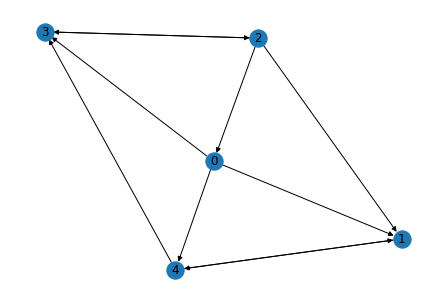

In [50]:
nx.draw(random_directed_graph, with_labels=True)

In [49]:
nx.betweenness_centrality(random_directed_graph)

{0: 0.08333333333333333,
 1: 0.08333333333333333,
 2: 0.41666666666666663,
 3: 0.41666666666666663,
 4: 0.25}

TODO - Add implementation